In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import tensorflow as tf

2021-11-19 08:27:58.600586: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


## Model tabular MFTMVI

In [2]:
model_1 = pd.read_csv('./tabularSlope+Intercept.csv')
wSILS = model_1["slope_weight"]
qwSILS = model_1["slope_density"]

bSILS = model_1 ["intercept_weight"]
qbSILS = model_1["intercept_density"]


##for calculating uncertainty range
sampleSILS = model_1["sampleW"]

# Model 1: CNN + TMVI TAB

In [3]:
m1 = pd.read_csv('m1_slope.csv')
wOnlyTab = m1["slope_weight"]
qwOnlyTab = m1["slope_density"]

##for calculating uncertainty range
sampleOnlyTab = m1["sampleSlope"]

# Model 2: CNN MF TMVI + TAB MF TMVI

In [4]:
m2 = pd.read_csv('m2_slope.csv')
wBoth = m2["slope_weight"]
qwBoth = m2["slope_density"]

##for calulating uncertainty range
sampleBoth = m2["SampleW"]

## MCMC slope

In [5]:
mcmc = pd.read_csv('../thesis/data/mcmcSampleTabular.csv')
sampleSlope = mcmc["slope"]
sampleIntercept = mcmc["intercept"]

## MCMC nullmodel

In [6]:
mcmcNull = pd.read_csv('../thesis/data/nullmodelMCMC.csv')
sampleNull = mcmcNull["sample"]

## MCMC fix intercept

In [7]:

mcmcFixSlope = pd.read_csv('../thesis/data/mcmcSample_fixIntercept.csv')
sampleFixSlope = mcmcFixSlope["sample"]

## TM-VI Null model

In [8]:
model_1 = pd.read_csv('../thesis/data/tabularNullmodel.csv')
wNull = model_1["weight"]
qwNull = model_1["density"]

In [9]:
## TM-VI fix intercept

In [10]:
model_1 = pd.read_csv('../thesis/data/tabularSlope_FixIntercept.csv')
wfix = model_1["weight"]
qwfix = model_1["density"]

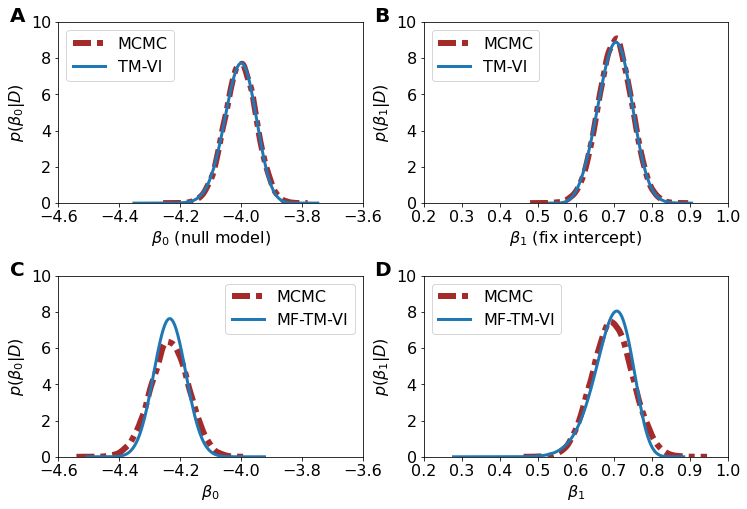

In [110]:
plt.figure(figsize=(12,8))
plt.rcParams.update(({'font.size': 16}))
plt.subplot(221)
sns.kdeplot(sampleNull, color='brown',zorder=2, label=r'MCMC',linewidth=6., linestyle=(0, (3, 1, 1, 1)))
plt.plot(wNull, qwNull, label ="TM-VI",linewidth=3.0)
plt.text(-4.76, 10,"A", 
            size=20, weight='bold')
plt.xlabel("$\\beta_0$ (null model)")
plt.ylabel("$p(\\beta_0|D)$")
plt.yticks(np.arange(0.0, 12, 2))
plt.xticks(np.arange(-4.6, -3.4, 0.2))

plt.legend()    
plt.subplot(222)
sns.kdeplot(sampleFixSlope, color='brown',zorder=2, label=r'MCMC',linewidth=6., linestyle=(0, (3, 1, 1, 1)))
plt.plot(wfix, qwfix, label ="TM-VI",linewidth=3.0)
plt.text(0.07, 10,"B", 
            size=20, weight='bold')
plt.ylabel("$p(\\beta_1|D)$")
plt.xlabel("$\\beta_1$ (fix intercept)")
plt.yticks(np.arange(0.0, 12, 2))
plt.xticks(np.arange(0.2, 1.1, 0.1))
plt.legend()
plt.subplots_adjust( hspace=0.4)
           
plt.subplot(223)
sns.kdeplot(sampleIntercept, color='brown',zorder=2, label=r'MCMC',linewidth=6., linestyle=(0, (3, 1, 1, 1)))
plt.plot(bSILS, qbSILS, label ="MF-TM-VI",linewidth=3.0)
plt.text(-4.76, 10,"C", 
            size=20, weight='bold')
plt.ylabel("$p(\\beta_0|D)$")
plt.xlabel("$\\beta_0$")
plt.yticks(np.arange(0.0, 12, 2))
plt.xticks(np.arange(-4.6, -3.4, 0.2))
plt.legend()
plt.subplot(224)
sns.kdeplot(sampleSlope, color='brown', zorder=2,label=r'MCMC',linewidth=6., linestyle=(0, (3, 1, 1, 1)))
plt.plot(wSILS, qwSILS, label ="MF-TM-VI",linewidth=3.0)
plt.text(0.07, 10,"D", 
            size=20, weight='bold')
plt.ylabel("$p(\\beta_1|D)$")
plt.xlabel("$\\beta_1$")
plt.yticks(np.arange(0.0, 12, 2))
plt.xticks(np.arange(0.2, 1.1, 0.1))
plt.legend()
#plt.savefig('./plots/uncertainty/tabularPosteriors.pdf')


plt.show()

In [11]:
import numpy as np
def HDI_from_samples(posterior_samples, credible_mass):
    # Computes highest density interval from a sample of representative values,
    # estimated as the shortest credible interval
    # Takes Arguments posterior_samples (samples from posterior) and credible mass (normally .95)
    sorted_points = sorted(posterior_samples)
    ciIdxInc = np.ceil(credible_mass * len(sorted_points)).astype('int')
    nCIs = len(sorted_points) - ciIdxInc
    ciWidth = [0]*nCIs
    for i in range(0, nCIs):
        ciWidth[i] = sorted_points[i + ciIdxInc] - sorted_points[i]
        HDImin = sorted_points[ciWidth.index(min(ciWidth))]
        HDImax = sorted_points[ciWidth.index(min(ciWidth))+ciIdxInc]
    return(HDImin, HDImax)

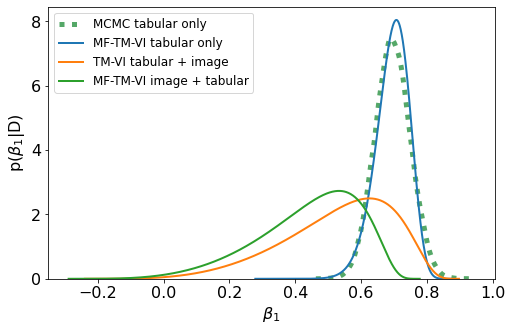

In [200]:
#### plot variational Distribution
#sns.reset_orig()
plt.figure(figsize=(8,5))
plt.rcParams.update(({'font.size': 16}))
sns.kdeplot(sampleSlope, color='g',zorder=2, label=r'MCMC tabular only',linewidth=5., linestyle=(0, (1, 1.5)))

plt.plot(wSILS, qwSILS, label ="MF-TM-VI tabular only ",linewidth=2.0)
plt.plot(wOnlyTab, qwOnlyTab, label ="TM-VI tabular + image",linewidth=2.0)
plt.plot(wBoth, qwBoth, label ="MF-TM-VI image + tabular",linewidth=2.0)


plt.legend(fontsize=12)
plt.xlabel("$\\beta_1$")
plt.ylabel("p($\\beta_1$|D)")
plt.savefig("plots/Figure.pdf")

In [131]:
#s = np.asarray(sampleW)
#s2 = np.asarray(sampleW2)
#az.summary(s)

In [306]:
#datadict = {
  #  "Without CNN Bayes": s,
 #   "With CNN Bayes": s2,
 #   "MCMC": sampleSlope
  
#}
#dataset = az.convert_to_inference_data(datadict)
#dataset

In [13]:
both = np.asarray(sampleBoth)
onlyTab =np.asarray(sampleOnlyTab)
SILS = np.asarray(sampleSILS)

In [17]:
HDI_from_samples(SILS,0.95),HDI_from_samples(onlyTab,0.95),HDI_from_samples(both,0.95)

((0.5963838, 0.79209167), (0.18834445, 0.79278255), (0.13990429, 0.70200944))

In [220]:
import arviz as az
az.hdi(SILS),az.hdi(onlyTab),az.hdi(both)

(array([0.60677415, 0.79209167]),
 array([0.20251447, 0.79063773]),
 array([0.14410558, 0.6894067 ]))

In [221]:
counts, bins = np.histogram(sampleSILS, bins=20)
max_bin = np.argmax(counts)
sampleSILS_Mode =bins[max_bin:max_bin+2].mean()

counts, bins = np.histogram(sampleOnlyTab, bins=20)
max_bin = np.argmax(counts)
sampleOnlyTab_Mode =bins[max_bin:max_bin+2].mean()

counts, bins = np.histogram(sampleBoth, bins=20)
max_bin = np.argmax(counts)
sampleBoth_Mode =bins[max_bin:max_bin+2].mean()

In [222]:
sampleSILS_Mode,sampleOnlyTab_Mode,sampleBoth_Mode

(0.72645671, 0.5895488688500001, 0.50819445575)

Text(0, 0.5, 'p($\\beta_1$|D)')

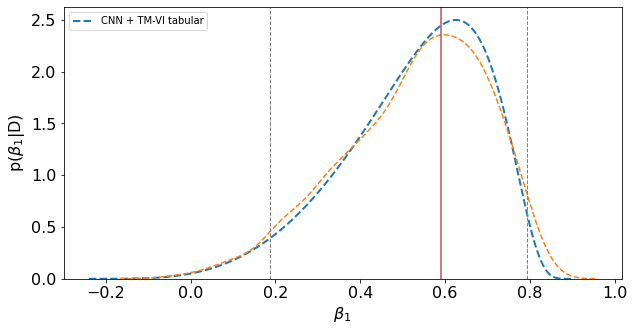

In [204]:
#### plot variational Distribution
plt.figure(figsize=(10,5))
plt.rcParams.update(({'font.size': 16}))
#sns.kdeplot(sampleSlope, color='g',zorder=2, label=r'MCMC tabular only',linewidth=5., linestyle=(0, (1, 1.5)))
plt.plot(wOnlyTab,qwOnlyTab,label ="CNN + TM-VI tabular",linewidth=2.0,linestyle="--")
sns.kdeplot(sampleOnlyTab,linestyle="--")
# high density intervals
plt.axvline(x=onlyTabInterval[0], color='grey', linestyle='--', linewidth=1)
plt.axvline(x=onlyTabInterval[1], color='grey', linestyle='--', linewidth=1)
plt.axvline(x=sampleOnlyTab_Mode, color='r')





#plt.plot(w3, qw3, label ="CNN last layer Gaussian-VI + Gaussian-VI Age",linewidth=2.0)
plt.legend(fontsize=10)
#plt.title("Posterior distribution $p(\\beta_1|D)$")


plt.xlabel("$\\beta_1$")
plt.ylabel("p($\\beta_1$|D)")


In [ ]:
#### plot variational Distribution
plt.figure(figsize=(10,5))
plt.rcParams.update(({'font.size': 16}))
#sns.kdeplot(sampleSlope, color='g',zorder=2, label=r'MCMC tabular only',linewidth=5., linestyle=(0, (1, 1.5)))
#plt.plot(w1,qw1,label ="CNN + TM-VI tabular",linewidth=2.0,linestyle="--")
sns.kdeplot(sampleW,linestyle="--")
# high density intervals
plt.axvline(x=h[0], color='grey', linestyle='--', linewidth=1)
plt.axvline(x=h[1], color='grey', linestyle='--', linewidth=1)
plt.axvline(x=s, color='r')





#plt.plot(w3, qw3, label ="CNN last layer Gaussian-VI + Gaussian-VI Age",linewidth=2.0)
plt.legend(fontsize=10)
#plt.title("Posterior distribution $p(\\beta_1|D)$")


plt.xlabel("$\\beta_1$")
plt.ylabel("p($\\beta_1$|D)")

## Train Data LR

In [4]:
dat = pd.read_csv('../thesis/train_data.csv')
age = dat["age"]
y_train = dat["y_train"]

In [5]:
age = age.values.reshape(-1,1)

In [6]:
from sklearn.linear_model import LogisticRegression
modelLog = LogisticRegression()
model = modelLog.fit(age,y_train)

In [7]:
model.coef_, model.intercept_

(array([[0.70359662]]), array([-4.24852647]))

In [8]:
import statsmodels.formula.api as smf
reg1 = smf.logit("y_train ~ age  ", data=dat).fit()
print(reg1.summary())

Optimization terminated successfully.
         Current function value: 0.085062
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                y_train   No. Observations:                21200
Model:                          Logit   Df Residuals:                    21198
Method:                           MLE   Df Model:                            1
Date:                Sun, 14 Nov 2021   Pseudo R-squ.:                 0.04725
Time:                        11:01:13   Log-Likelihood:                -1803.3
converged:                       True   LL-Null:                       -1892.8
Covariance Type:            nonrobust   LLR p-value:                 8.592e-41
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2499      0.063    -67.044      0.000      -4.374      -4.126
age            0.7057      0.

In [31]:
from contextlib import redirect_stdout

with open('LR_standAge.txt', 'w') as f:
    with redirect_stdout(f):
        print(reg1.summary())